In [3]:
with open('test.txt', 'rt') as f:
    test = f.readlines()

In [19]:
with open('input', 'rt') as f:
    inp = f.readlines()

In [17]:
def neighbors(pos: tuple[int, int]) -> set[tuple[int, int]]:
    return {(pos[0]+1, pos[1]), (pos[0]-1, pos[1]), (pos[0], pos[1]+1), (pos[0], pos[1]-1)}

def part1(garden: list[str], steps: int) -> int:
    walls: set[tuple[int, int]] = set()
    pos: set[tuple[int, int]] = set()
    for y, l in enumerate(garden):
        for x, t in enumerate(l.strip()):
            if t == 'S':
                pos = {(x , y)}
            if t == '#':
                walls |= {(x, y)}
    lenx = len(garden[0])
    leny = len(garden)
    for x in range(lenx):
        walls |= {(x, -1), (x, leny)}
    for y in range(leny):
        walls |= {(-1, y), (lenx, y)}
    for _ in range(steps):
        newpos = set()
        for p in pos:
            newpos |= neighbors(p) - walls
        pos = newpos
    return len(pos)

In [18]:
part1(test, 6)

16

In [20]:
with open('output1', 'wt') as f:
    f.write(str(part1(inp, 64)))

In [36]:
def run2(garden: list[str], steps: int) -> int:
    walls: set[tuple[int, int]] = set()
    pos: set[tuple[int, int]] = set()
    lenx = len(garden[0].strip())
    leny = len(garden)
    for y, l in enumerate(garden):
        for x, t in enumerate(l.strip()):
            if t == 'S':
                pos = {(x, y)}
            if t == '#':
                walls |= {(x, y)}
    for _ in range(steps):
        newpos = set()
        for p in pos:
            for n in neighbors(p):
                if (n[0]%lenx, n[1]%leny) not in walls:
                    newpos |= {n}
        pos = newpos
    return len(pos)

In [37]:
run2(test, 6)

16

In [38]:
run2(test, 10)

50

In [39]:
run2(test, 50)

1594

In [42]:
plots = []
steps = []
for i in range(10):
    s = len(test)//2+1+i*len(test)
    plots.append(run2(test, s))
    steps.append(s)

In [68]:
plots = []
steps = []
for s in range(100):
    #s = len(test)//2+1+i*len(test)
    plots.append(run2(test, s))
    steps.append(s)

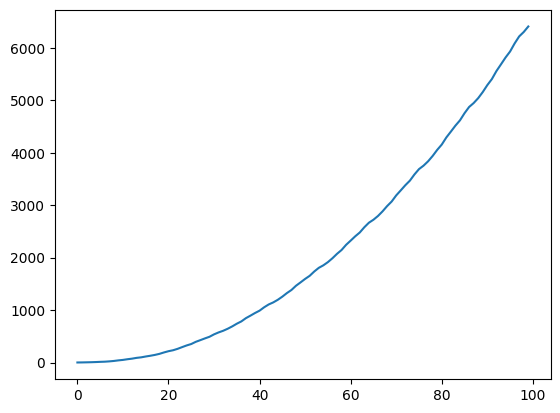

In [69]:
import matplotlib.pyplot as plt

plt.plot(steps, plots)

In [58]:
import numpy as np

m = np.zeros((3, 3))
fv = np.zeros((3,1))
for i in range(3):
    s = len(test)//2+1+i*len(test)
    m[i, 0] = s**2
    m[i, 1] = s
    m[i, 2] = 1
    fv[i] = run2(test, s)

coeffs = np.matrix(m).I @ fv

In [61]:
[coeffs[0][0,0]*s**2+coeffs[1][0,0]*s+coeffs[0][0,0] for s in steps]

[-7.264462809917305,
 121.73553719008267,
 436.73553719008254,
 937.7355371900821,
 1624.7355371900817,
 2497.7355371900812,
 3556.735537190081,
 4801.73553719008,
 6232.7355371900785,
 7849.7355371900785]

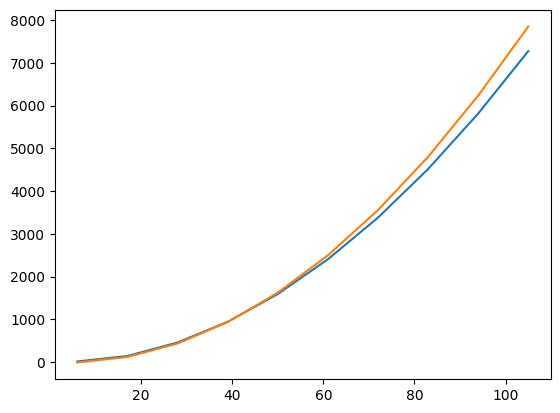

In [62]:
import matplotlib.pyplot as plt

plt.plot(steps, plots)
plt.plot(steps, [coeffs[0][0,0]*s**2+coeffs[1][0,0]*s+coeffs[0][0,0] for s in steps])

In [84]:
def part2(garden: list[str]) -> int:
    m = np.zeros((3, 3))
    fv = np.zeros((3,1))
    for i, s in enumerate([65, 65+131, 65+2*131]):
        m[i, 0] = s**2
        m[i, 1] = s
        m[i, 2] = 1
        fv[i] = run2(garden, s)

    coeffs = np.matrix(m).I @ fv
    steps = 26501365
    return int(coeffs[0,0]*steps**2+coeffs[1,0]*steps+coeffs[2,0])

In [86]:
with open('output2', 'wt') as f:
    f.write(str(part2(inp)))